In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [3]:
train_data_dir = "C://Users//srnva//Desktop//NIT Warangal//AI & Deep Learning//Convolutional Neural Network -2//Cats_and_Dogs//training_set//training_set"
test_data_dir = "C://Users//srnva//Desktop//NIT Warangal//AI & Deep Learning//Convolutional Neural Network -2//Cats_and_Dogs//test_set//test_set"

In [4]:
plt.imread(train_data_dir+'//dogs//dog.1.jpg').shape

(499, 327, 3)

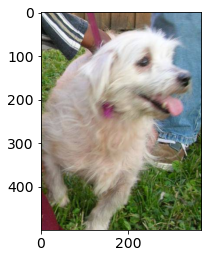

In [5]:
plt.imshow(plt.imread(train_data_dir+'//dogs//dog.9.jpg'))

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_image_generator = ImageDataGenerator(rescale=1./255, 
                                           horizontal_flip = True,
                                           shear_range = 0.2,
                                           zoom_range = 0.2)

validation_image_generator = ImageDataGenerator(rescale=1./255)

In [8]:
img_height, img_width = 150, 150
batch_size = 32

In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size = batch_size,
                                                           directory = train_data_dir,
                                                           shuffle = True,
                                                           target_size = (img_height, img_width),
                                                           class_mode = 'binary',
                                                           classes = ['cats','dogs'])

Found 8005 images belonging to 2 classes.


In [10]:
train_data_gen.class_indices

{'cats': 0, 'dogs': 1}

In [11]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size = batch_size,
                                                           directory = test_data_dir,
                                                           target_size = (img_height, img_width),
                                                           class_mode = 'binary',
                                                           classes = ['cats','dogs'])

Found 2023 images belonging to 2 classes.


In [12]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [13]:
augmented_Images = [train_data_gen[0][0][4] for i in range(5)]

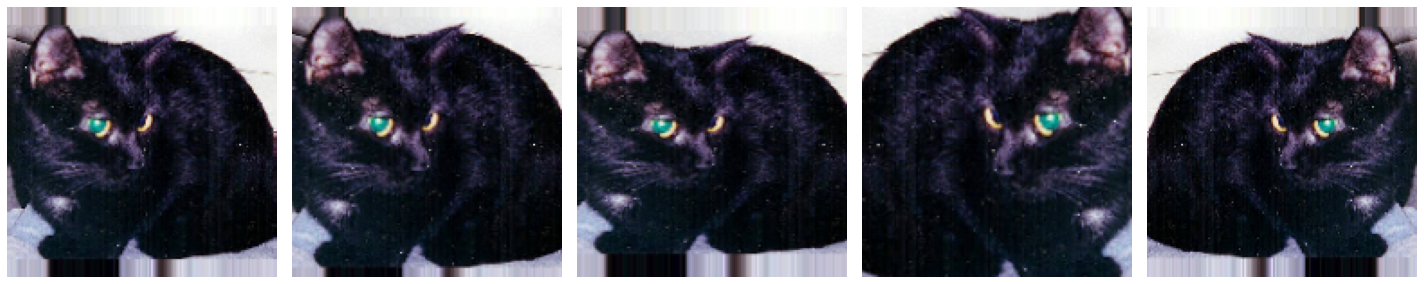

In [14]:
plotImages(augmented_Images)

### Building CNN model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation

In [16]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (img_height, img_width, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [18]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [28]:
model.fit_generator(generator = train_data_gen, steps_per_epoch = 50, epochs = 1, 
                    validation_data = val_data_gen, validation_steps =50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 50 steps, validate for 50 steps
50/50 [==============================] - 149s 3s/step - loss: 0.6924 - accuracy: 0.5138 - val_loss: 0.6916 - val_accuracy: 0.5144


In [20]:
json_config = model.to_json

In [21]:
from tensorflow.keras.preprocessing import image

In [30]:
test_image = image.load_img(test_data_dir+'//dogs//dog.4030.jpg', target_size = (150, 150))

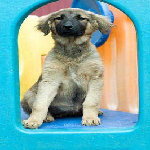

In [31]:
test_image

In [32]:
test_image = image.img_to_array(test_image)
test_image

array([[[ 76., 214., 242.],
        [ 71., 211., 238.],
        [ 65., 209., 236.],
        ...,
        [ 99., 220., 247.],
        [ 96., 214., 240.],
        [101., 216., 243.]],

       [[ 77., 215., 243.],
        [ 73., 211., 239.],
        [ 66., 210., 237.],
        ...,
        [ 88., 212., 238.],
        [ 80., 200., 225.],
        [ 98., 213., 240.]],

       [[ 83., 218., 247.],
        [ 79., 214., 243.],
        [ 74., 212., 241.],
        ...,
        [ 85., 211., 236.],
        [ 80., 202., 226.],
        [ 99., 217., 243.]],

       ...,

       [[ 12., 200., 229.],
        [ 10., 195., 225.],
        [  6., 191., 222.],
        ...,
        [  3., 191., 218.],
        [  5., 193., 222.],
        [  5., 194., 224.]],

       [[ 14., 193., 223.],
        [ 12., 191., 221.],
        [ 11., 190., 222.],
        ...,
        [  3., 191., 218.],
        [  4., 193., 222.],
        [  4., 195., 224.]],

       [[ 22., 191., 222.],
        [ 18., 189., 219.],
        [ 15., 1

In [33]:
test_image.shape

(150, 150, 3)

In [34]:
test_image = np.expand_dims(test_image, axis = 0)
test_image.shape

(1, 150, 150, 3)

In [35]:
model.predict(test_image)

array([[1.]], dtype=float32)